In [1]:
graph = {0: [1, 2], 1: [0, 3, 4], 2: [0, 5], 3: [1], 4: [1, 5], 5: [2, 4]}


def dfs(graph, start):
    visited = []  # 방문한 노드를 추적하는 리스트

    stack = [start]  # 시작 노드를 스택에 추가

    while stack:  # 스택에서 노드를 하나씩 꺼내면서 방문
        node = stack.pop()  # 스택에서 노드를 꺼내어 변수 node에 저장

        if node not in visited:  # 해당 노드를 방문하지 않았다면, 방문하고 이웃 노드를 스택에 추가
            visited.append(node)  # 해당 노드를 방문

            for neighbor in graph[node]:  # 해당 노드에 연결된 이웃 노드를 스택에 추가
                if neighbor not in visited:
                    stack.append(neighbor)

    return visited

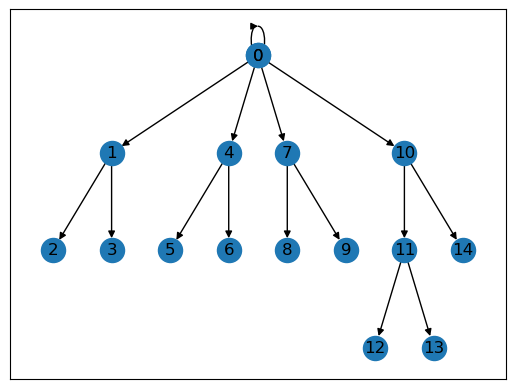

In [10]:
import networkx as nx
import matplotlib.pyplot as plt


# 노드(parent)와 자식 노드(child)를 입력으로 받아서 하이레키컬한 그래프를 생성하는 함수
def generate_graph(parent, child, g):
    """
    parent: 노드의 부모
    child: 자식 노드 리스트
    g: networkx 그래프 객체
    """
    for c in child:
        g.add_edge(parent, c)  # 부모 노드와 자식 노드 간의 연결 추가
        generate_graph(c, child[c], g)  # 자식 노드를 시작으로 다시 함수 호출하여 하위 그래프 생성


# 하이레키컬한 구조를 나타내는 딕셔너리 생성
tree = {0: {1: {2: {}, 3: {}}, 4: {5: {}, 6: {}}}, 7: {8: {}, 9: {}}, 10: {11: {12: {}, 13: {}}, 14: {}}}

# 그래프 생성
tree_graph = nx.DiGraph()  # 방향 그래프(Directed Graph) 객체 생성
generate_graph("0", tree, tree_graph)  # 하이레키컬한 그래프 생성

# 높은 랭크의 노드가 위쪽에 배치하도록 dot 레이아웃 사용
pos = nx.nx_pydot.graphviz_layout(tree_graph, prog="dot")

# 그래프 그리기
nx.draw_networkx(tree_graph, pos, with_labels=True)
plt.show()  # 그래프 화면 출력

C:\Users\sacer\AppData\Local\Temp\ipykernel_16996\686582498.py:30: UserWarning: frames=None which we can infer the length of, did not pass an explicit *save_count* and passed cache_frame_data=True.  To avoid a possibly unbounded cache, frame data caching has been disabled. To suppress this warning either pass `cache_frame_data=False` or `save_count=MAX_FRAMES`.
  ani = animation.FuncAnimation(fig, animate, frames=dfs(0), interval=1000, repeat=False)


KeyboardInterrupt: 

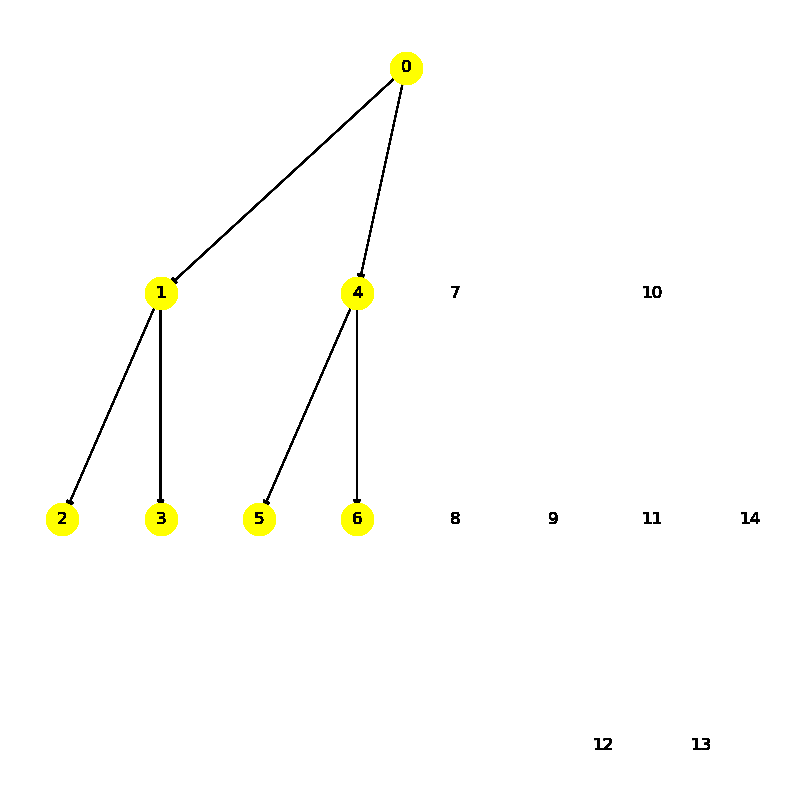

In [11]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.animation as animation

def animate(i):
    pos = nx.nx_pydot.graphviz_layout(tree_graph, prog="dot")
    nx.draw_networkx(tree_graph, pos, with_labels=True, node_color=node_color, edgelist=edges)
    nx.draw_networkx_nodes(tree_graph, pos, nodelist=current_nodes, node_size=node_size, node_color=node_color_highlight)
    plt.axis("off")

def dfs(v):
    global current_nodes, edges  # 전역 변수로 선언하여 draw() 함수에서 사용
    current_nodes.append(v)
    for u in tree_graph.successors(v):
        edges.append((v,u))
        dfs(u)
        current_nodes.append(v)

tree = {0: {1: {2: {}, 3: {}}, 4: {5: {}, 6: {}}}, 7: {8: {}, 9: {}}, 10: {11: {12: {}, 13: {}}, 14: {}}}
tree_graph = nx.DiGraph()
node_color = "white"
node_color_highlight = "yellow"
node_size = 500
edges = []
current_nodes = []

generate_graph('0', tree, tree_graph)

fig = plt.figure(figsize=(10, 10))
ani = animation.FuncAnimation(fig, animate, frames=dfs(0), interval=1000, repeat=False)
ani.save('dfs.gif',writer='pillow')
plt.show()
